### 1. Вес и важность признаков в линейной регрессии и  случайном лесе

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_pandas (2).csv')
display(df.shape)
df.head(1)
# фиксируем 14 признаков всего

(303, 14)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1


кодир категор перем
обуч лог рег
предск вероятн для каждого

In [3]:
# выделили категориальные признаки
X_cat = df.select_dtypes(include='object')
display(X_cat.shape)
display(X_cat.columns)
X_cat.head(1)
# категориальных признаков 7

(303, 7)

Index([u'sex', u'chest_pain_type', u'fasting_blood_sugar', u'rest_ecg',
       u'exercise_induced_angina', u'st_slope', u'thalassemia'],
      dtype='object')

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
0,male,non-anginal pain,greater than 120mg/ml,normal,no,upsloping,normal


In [4]:
# кодируем категориальные признаки путем их векторизации
X_1 = pd.get_dummies(df, columns=X_cat.columns)
display(X_1.shape)
display(X_1.columns)
X_1.head(1)

(303, 24)

Index([u'age', u'resting_blood_pressure', u'cholesterol',
       u'max_heart_rate_achieved', u'st_depression', u'num_major_vessels',
       u'target', u'sex_female', u'sex_male',
       u'chest_pain_type_atypical angina', u'chest_pain_type_non-anginal pain',
       u'chest_pain_type_typical angina',
       u'fasting_blood_sugar_greater than 120mg/ml',
       u'fasting_blood_sugar_lower than 120mg/ml',
       u'rest_ecg_ST-T wave abnormality',
       u'rest_ecg_left ventricular hypertrophy', u'rest_ecg_normal',
       u'exercise_induced_angina_no', u'exercise_induced_angina_yes',
       u'st_slope_flat', u'st_slope_upsloping', u'thalassemia_fixed defect',
       u'thalassemia_normal', u'thalassemia_reversable defect'],
      dtype='object')

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_atypical angina,...,rest_ecg_ST-T wave abnormality,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0


In [5]:
# выделяем целевой вектор
y = df['target']
y.shape

(303,)

In [6]:
# удаляем целевой вектор из выборки
X_1 = X_1.drop(['target'], axis=1)

In [7]:
X_1.shape

(303, 23)

####  обучить LogisticRegression на X_1, получить наибольшее по модулю значение весового коэффициента

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# обучаем логистическую регрессию
LR = LogisticRegression()
LR.fit(X_1, y)

/home/thomas/anaconda2/envs/env_py2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# предсказываем вероятность (0 или 1) для каждого целевого признака
LR.predict_proba(X_1[:3])

array([[0.3605023 , 0.6394977 ],
       [0.15589797, 0.84410203],
       [0.07627387, 0.92372613]])

In [12]:
# запрашиваем весовые коэффициенты признаков в решающей функции
LR.coef_

array([[ 0.00602155, -0.0136609 , -0.00374589,  0.02283358, -0.44947374,
        -0.8125176 ,  0.69350891, -0.52924244,  0.55536124,  0.50381944,
        -0.89491422,  0.16570316, -0.00143669,  0.38531444, -0.07660078,
        -0.14444719,  0.53839281, -0.37412634,  0.46438865, -0.30012219,
         0.66940876,  0.25783229, -0.76297458]])

In [29]:
# форматируем массив в абсолютные значения
for coef in LR.coef_:
    LR_coef_abs = abs(LR.coef_)
# получаем список 
importances_LR = LR_coef_abs.tolist()[0]
# формируем пары признак:значение
feature_importances_LR = [(feature, round(importance_LR, 2)) for feature, importance_LR in zip(X_1.columns, importances_LR)]
#display(feature_importances_LR )
# сортируем признаки по степени важности по мере убывания
feature_importances_LR = sorted(feature_importances_LR, key = lambda x: x[1], reverse = True)
# печатаем пару с наибольшим по модулю весом признака 
print ('Variable for LR: {} Importance: {}'.format(feature_importances_LR[0][0], feature_importances_LR[0][1])) 
#for pair in feature_importances_LR:
 #    print ('Variable: {} Importance: {}'.format(*pair)) 

Variable for LR: chest_pain_type_typical angina Importance: 0.89


#### обучить RandomForest на X_1, получить наибольшее по модулю значение весового коэффициента

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rnd_frst = RandomForestClassifier(min_samples_split=2, random_state=0)
rnd_frst.fit(X_1, y)
display(rnd_frst.feature_importances_.shape)

/home/thomas/anaconda2/envs/env_py2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(23,)

In [28]:
# получаем список 
importances_rfc = list(rnd_frst.feature_importances_)
# формируем пары признак:значение
feature_importances_rfc = [(feature, round(importance_rfc, 2)) for feature, importance_rfc in zip(X_1.columns, importances_rfc)]
#display(feature_importances_rfc)
# сортируем признаки по степени важности по мере убывания
feature_importances_rfc = sorted(feature_importances_rfc, key = lambda x: x[1], reverse = True)
# печатаем пару с наибольшим по модулю весом признака 
print ('Variable for RFC: {} Importance: {}'.format(feature_importances_rfc[0][0], feature_importances_rfc[0][1])) 
#for pair in feature_importances_rfc:
 #    print ('Variable: {:23} Importance: {}'.format(*pair)) 
print ('Variable for RFC sum: {}'.format(sum(importances_rfc)))

Variable for RFC: thalassemia_fixed defect Importance: 0.14
Variable for RFC sum: 1.0


#### Видим, что значения коэффициентов не равны. Также, не совпадают и сами признаки. 
#### Это происходит по тому, что Логистическая регрессия и Случайный лес - это разные алгоритмы и они воспринимают переменные как важные, исходя из разных принципов. 
#### В Логистической регрессии вес признака связан со степенью линейной зависимости целевого значения от этого признака. Чем больше вес - тем больше линейная зависимость. 
#### В Случайном лесе важность признака также зависит от степени его влияния на целевую переменную, но эта зависимость может быть нелинейной. Поэтому, наиболее важные признаки для Логистической регрессии и Случайного леса могут быть разными.

In [18]:
rnd_frst_1 = RandomForestClassifier(n_estimators=10, max_depth = 3)
rnd_frst_1.fit(X_1, y)
# визуализирую отдельное небольшое дерево решений
from sklearn.tree import export_graphviz
import pydot
# извлекаю дерево
tree_small = rnd_frst_1.estimators_[5]
# сохраняю рисунок в файл
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_1.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

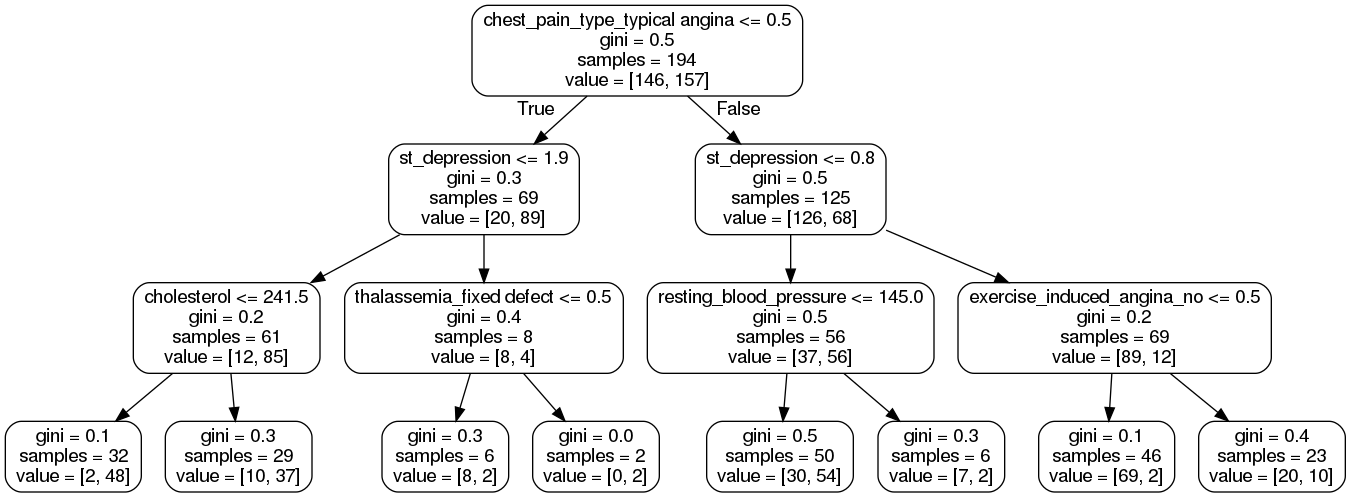

In [19]:
# смотрим рисунок
from IPython.display import Image
Image(filename='small_tree.png')

### 2. Lasso (Least absolute shrinkage and selection operator)  - метод оценивания коэффициентов линейной регрессионной модели

Регрессионные модели имеют свойство переобучаться. Переобучение дает неплавные кривые прогнозирования, по другому говоря - "нерегулярные". Такие сложные кривые прогнозирования обычно характеризуются весовыми значениями, которые имеют очень большие по модулю величины. Поэтому один из способов уменьшить степень переобучения состоит в том, чтобы не допускать очень больших весовых значений для модели. Это решается путем регуляризации модели.

Кроме этого у регрессионных моделей возможно явление мультиколлинеарности, то есть наличие линейной зависимости между признаками. Мультиколлинеарность приводит к неустойчивости оценок. Эта неустойчивость выражается в увеличении статистической неопределенности — дисперсии оценок, когда конкретные результаты сильно различаться для разных выборок несмотря на то, что выборки однородны.
Решение проблемы мультиколлинеарности также состоит в регуляризации линейной модели. 

Регуляризация - это добавление некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эти ограничения часто имеет вид штрафа за сложность модели. 

При обучении модели мы используем некую меру ошибки, чтобы определять хорошие весовые значения. Есть несколько способов измерения ошибок. Один из самых распространенных методов — вычисление среднеквадратичной ошибки, где мы находим сумму квадратов разности между вычисленными выходными значениями для набора весовых значений и известными, правильными выходными значениями в обучающих данных, а затем делим эту сумму на количество обучающих элементов.

Чтобы величины весовых значений модели не становились большими, процесс регуляризации штрафует весовые значения, добавляя их в вычисление ошибки. Если весовые значения включаются в общую ошибку, которая минимизируется, тогда меньшие весовые значения будут давать меньшие значения ошибки. 

L1-регуляризация штрафует весовые значения добавлением суммы их абсолютных значений к ошибке.

Кроме этого, применение L1-регуляризации дает полезный побочный эффект, вызывающий стремление одного или более весовых значений к нулю, а это означает, что соответствующий признак не требуется для решения задачи. Это называется селекцией признаков.  

Для нахождения минимального значения функции потерь используется градиентный спуск. 

При L1-регуляризации дополнительный член является модулем. В случае модуля производная является константой с абсолютной величиной, равной единице. В нуле она не определена, но мы считаем её также равной нулю. Поэтому при L1-регуляризации градиентный спуск будет стремиться к нулю с постоянной скоростью, а достигнув его, там и останется. В следствие этого L1-регуляризация способствует равенству нулю весовых коэффициентов, тем самым провоцируя разрежённость выборки.

Нужно учитывать, что регуляризация дает смещение оценок, но в целом суммарная ошибка может быть меньше, поскольку меньше дисперсия оценок.
Недостаток L1-регуляризации состоит в том, что этот метод сложно использовать с алгоритмами ML-обучения, в которых используются численные методы для вычисления градиента. 